In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_data.shape

(1460, 81)

# Let's start with EDA 

<Axes: >

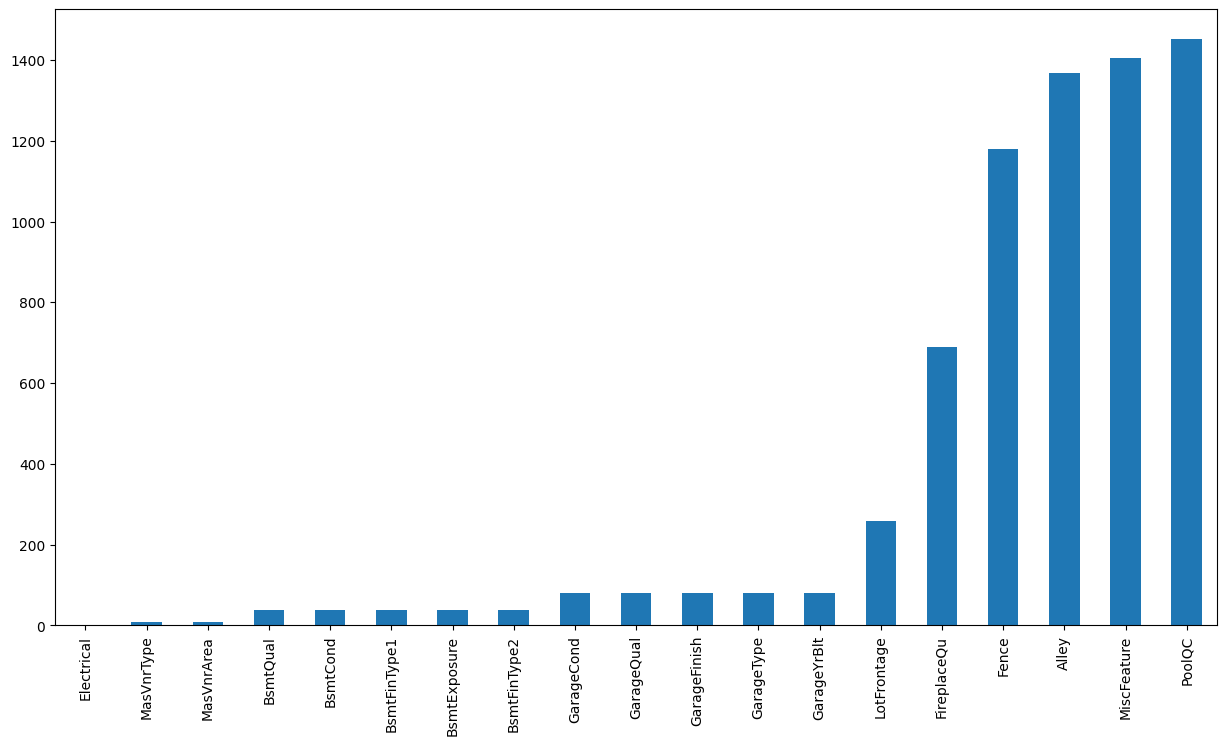

In [6]:
missing_data = train_data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing_data.plot.bar()

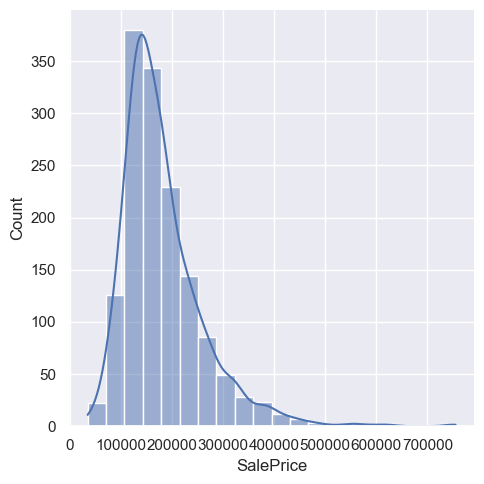

In [7]:
sns.set(rc={'figure.figsize':(15,8)})
sns.displot(train_data['SalePrice'], kde=True, bins=20)

In [8]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
numeric_features = train_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorial_features = train_data.select_dtypes(include=[object])
categorial_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
correlation = numeric_features.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'Correlation of numeric features with sale price'}>

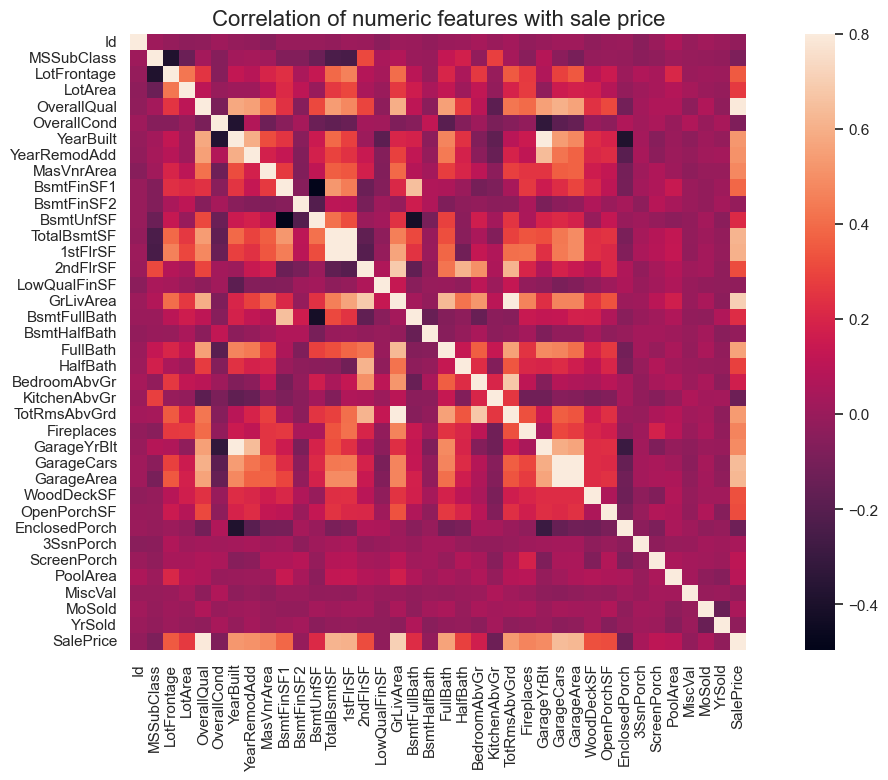

In [12]:
plt.title('Correlation of numeric features with sale price', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)

In [13]:
cols = correlation.nlargest(11, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

<Axes: >

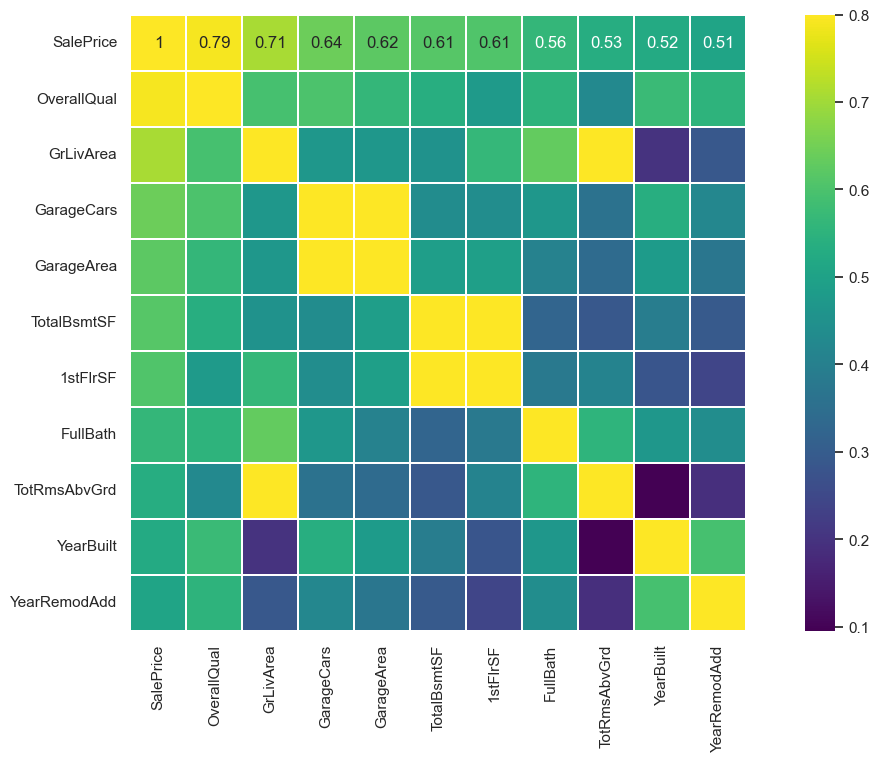

In [14]:
cm = np.corrcoef(train_data[cols].values.T)
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor='white', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

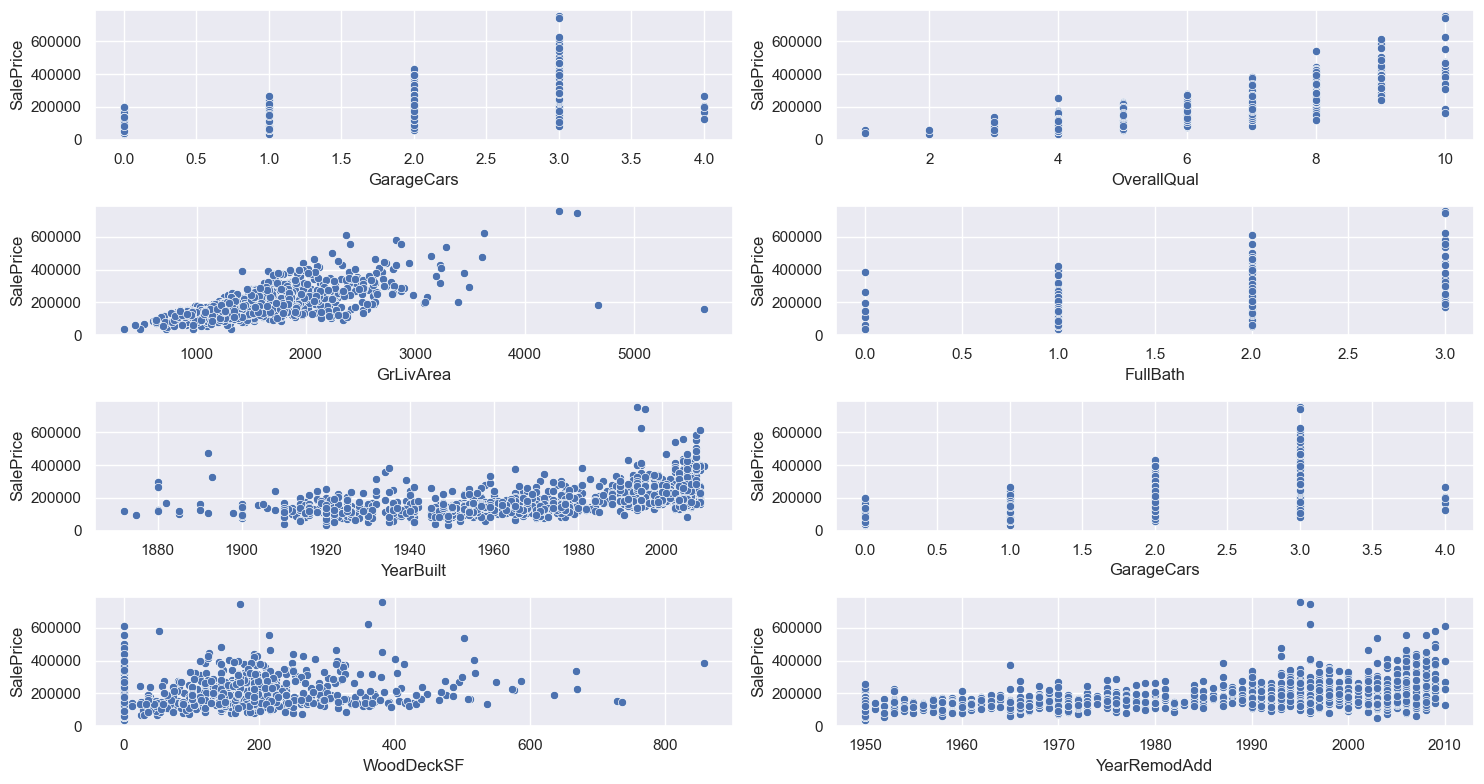

In [15]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(nrows=4, ncols=2)

sns.scatterplot(data=train_data, x='GarageCars', y='SalePrice', ax=ax1)
sns.scatterplot(data=train_data, x='OverallQual', y='SalePrice', ax=ax2)
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice', ax=ax3)
sns.scatterplot(data=train_data, x='FullBath', y='SalePrice', ax=ax4)
sns.scatterplot(data=train_data, x='YearBuilt', y='SalePrice', ax=ax5)
sns.scatterplot(data=train_data, x='GarageCars', y='SalePrice', ax=ax6)
sns.scatterplot(data=train_data, x='WoodDeckSF', y='SalePrice', ax=ax7)
sns.scatterplot(data=train_data, x='YearRemodAdd', y='SalePrice', ax=ax8)

plt.tight_layout()
plt.show()

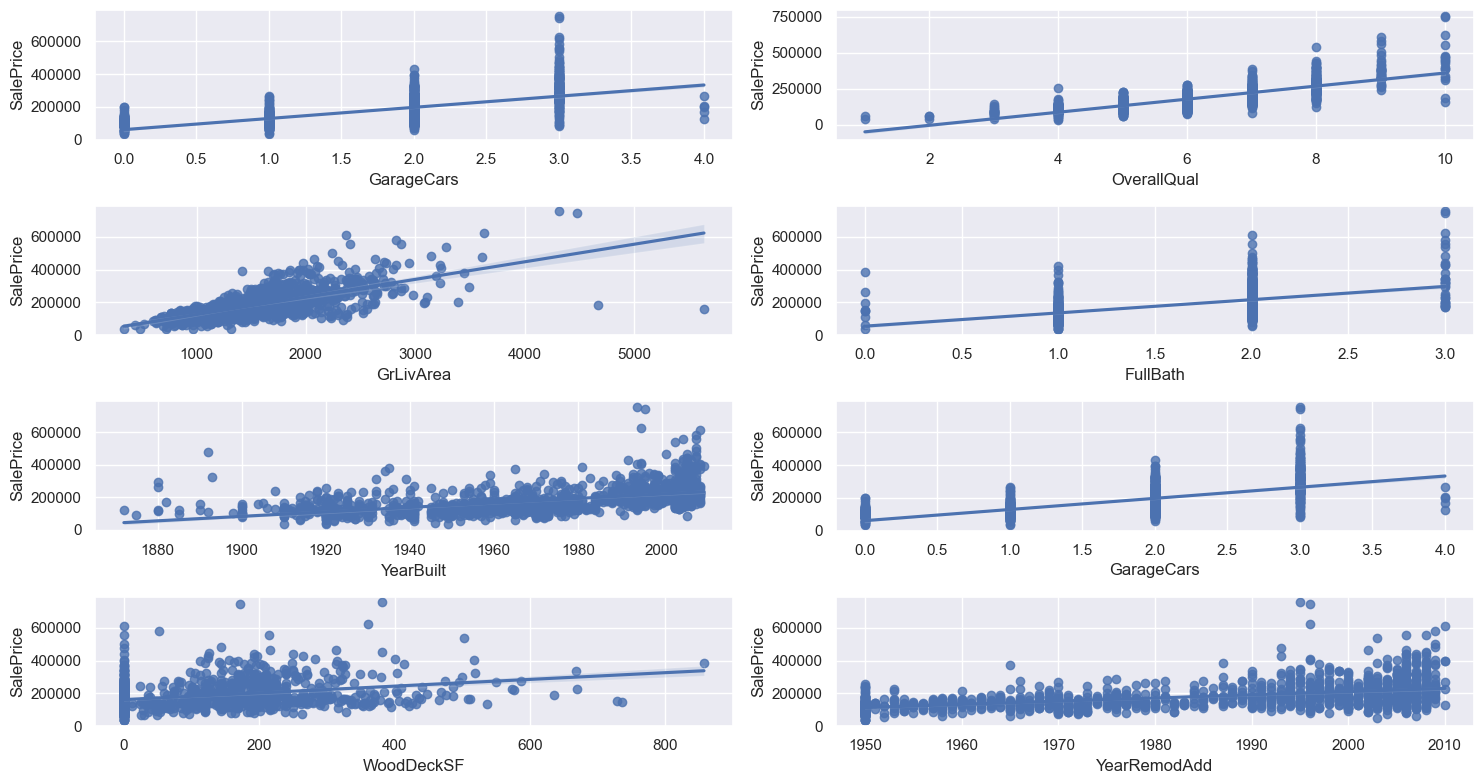

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(nrows=4, ncols=2)

sns.regplot(data=train_data, x='GarageCars', y='SalePrice', scatter=True, ax=ax1)
sns.regplot(data=train_data, x='OverallQual', y='SalePrice', scatter=True, ax=ax2)
sns.regplot(data=train_data, x='GrLivArea', y='SalePrice', scatter=True, ax=ax3)
sns.regplot(data=train_data, x='FullBath', y='SalePrice', scatter=True, ax=ax4)
sns.regplot(data=train_data, x='YearBuilt', y='SalePrice', scatter=True, ax=ax5)
sns.regplot(data=train_data, x='GarageCars', y='SalePrice', scatter=True, ax=ax6)
sns.regplot(data=train_data, x='WoodDeckSF', y='SalePrice', scatter=True, ax=ax7)
sns.regplot(data=train_data, x='YearRemodAdd', y='SalePrice', scatter=True, ax=ax8)

plt.tight_layout()
plt.show()

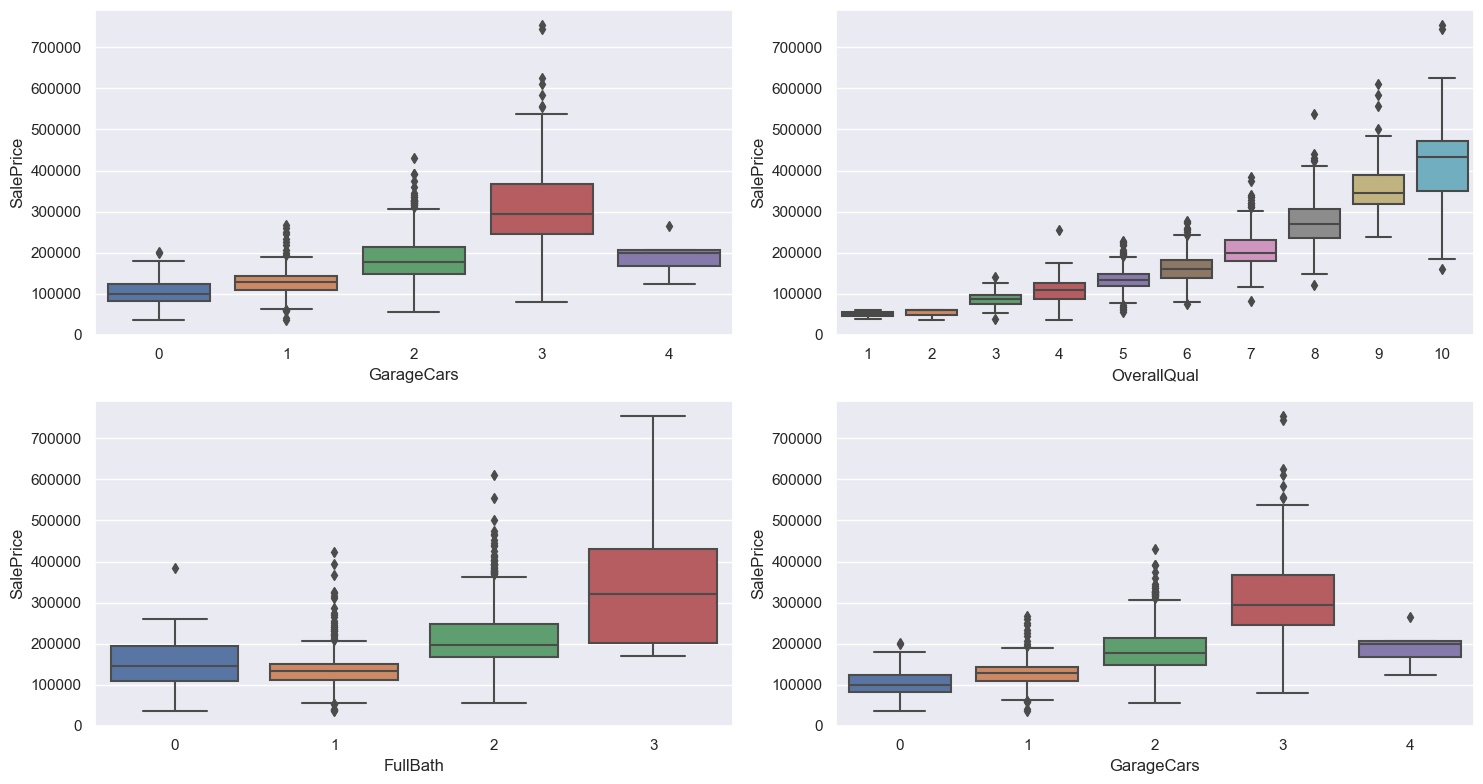

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

sns.boxplot(data=train_data, x='GarageCars', y='SalePrice', ax=ax1)
sns.boxplot(data=train_data, x='OverallQual', y='SalePrice', ax=ax2)
sns.boxplot(data=train_data, x='FullBath', y='SalePrice', ax=ax3)
sns.boxplot(data=train_data, x='GarageCars', y='SalePrice', ax=ax4)

plt.tight_layout()
plt.show()

# EDA Complete: We have identified columns with strong correlations. 
# Time to Streamline: Removing Redundant Columns. 

In [18]:
train_data_id = train_data['Id']

In [19]:
train_data_id

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [20]:
columns_to_remove = [
    'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 
    'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 
    'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 
    'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 
    'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'Alley', 'PoolQC',
    'Fence','MiscFeature', 'MasVnrType', 'FireplaceQu', 'LotFrontage'
]

In [21]:
train_data.drop(columns=columns_to_remove, inplace=True)

In [22]:
train_data.shape

(1460, 52)

In [23]:
train_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [24]:
train_data.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0


# Data Imputation: Handling  in 'train_data'

### Now, We will separate data into two part. 
#### 1. Numerical columns
#### 2. Categorical columns

In [25]:
numerical_columns_train_data = train_data[train_data.select_dtypes(include=['float64', 'int64']).columns]
categorical_columns_train_data = train_data[train_data.select_dtypes(include=['object']).columns]

In [26]:
numerical_columns_train_data

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,706,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,978,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,486,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,216,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,655,1145,1145,2198,2,9,1,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,0,953,953,1647,2,7,1,1999.0,2,460,175000
1456,6,1978,1988,119.0,790,1542,2073,2073,2,7,2,1978.0,2,500,210000
1457,7,1941,2006,0.0,275,1152,1188,2340,2,9,2,1941.0,1,252,266500
1458,5,1950,1996,0.0,49,1078,1078,1078,1,5,0,1950.0,1,240,142125


In [27]:
categorical_columns_train_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [28]:
numerical_columns_train_data.dtypes

OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
TotalBsmtSF       int64
1stFlrSF          int64
GrLivArea         int64
FullBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
SalePrice         int64
dtype: object

In [29]:
categorical_columns_train_data.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [30]:
train_columns_with_null = train_data.columns[train_data.isnull().any()]
train_data_with_null_columns = train_data[train_columns_with_null]
train_data_with_null_columns.isnull().sum()

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [31]:
missing_values_columns_train_data = train_data[train_columns_with_null].copy()

In [32]:
missing_values_columns_train_data

,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [33]:
numerical_missing_values_columns_train_data = missing_values_columns_train_data[missing_values_columns_train_data.select_dtypes(include=['float64', 'int64']).columns]
categorical_missing_values_columns_train_data = missing_values_columns_train_data[missing_values_columns_train_data.select_dtypes(include=['object']).columns]

In [34]:
numerical_missing_values_columns_train_data

,MasVnrArea,GarageYrBlt
0,196.0,2003.0
1,0.0,1976.0
2,162.0,2001.0
3,0.0,1998.0
4,350.0,2000.0
...,...,...
1455,0.0,1999.0
1456,119.0,1978.0
1457,0.0,1941.0
1458,0.0,1950.0


In [35]:
numerical_missing_values_columns_train_data.columns

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [36]:
categorical_missing_values_columns_train_data

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA
1456,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA
1457,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1458,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA


In [37]:
categorical_missing_values_columns_train_data.columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

### Numerical Imputation

In [38]:
for column in ['MasVnrArea', 'GarageYrBlt']:
    column_median = numerical_missing_values_columns_train_data[column].median()
    numerical_missing_values_columns_train_data.loc[:, column] = numerical_missing_values_columns_train_data[column].fillna(column_median)

/opt/homebrew/lib/python3.11/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [39]:
numerical_missing_values_columns_train_data

,MasVnrArea,GarageYrBlt
0,196.0,2003.0
1,0.0,1976.0
2,162.0,2001.0
3,0.0,1998.0
4,350.0,2000.0
...,...,...
1455,0.0,1999.0
1456,119.0,1978.0
1457,0.0,1941.0
1458,0.0,1950.0


In [40]:
numerical_missing_values_columns_train_data.isnull().sum()

MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Categorical Imputation

In [41]:
for column in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        column_mode = categorical_missing_values_columns_train_data[column].mode()[0]
        categorical_missing_values_columns_train_data.loc[:, column] = categorical_missing_values_columns_train_data[column].fillna(column_mode)

/opt/homebrew/lib/python3.11/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [42]:
categorical_missing_values_columns_train_data

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA
1456,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA
1457,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1458,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA


In [43]:
categorical_missing_values_columns_train_data.isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [44]:
train_data[numerical_missing_values_columns_train_data.columns] = numerical_missing_values_columns_train_data
train_data[categorical_missing_values_columns_train_data.columns] = categorical_missing_values_columns_train_data

In [45]:
train_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2003.0,RFn,2,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,1976.0,RFn,2,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2001.0,RFn,2,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1998.0,Unf,3,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2000.0,RFn,3,836,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1999.0,RFn,2,460,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,1978.0,Unf,2,500,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,1941.0,RFn,1,252,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,1950.0,Unf,1,240,TA,TA,Y,WD,Normal,142125


In [46]:
train_data.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

# Done Imputation 
# Encoding Categorical data 

In [47]:
categorical_columns_train_data = train_data[train_data.select_dtypes(include=['object']).columns]

In [48]:
categorical_columns_train_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [49]:
categorical_columns_train_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
encoded_categorical_train_data = pd.get_dummies(categorical_columns_train_data, drop_first=True)
train_data = pd.concat([train_data.drop(columns=categorical_columns_train_data), encoded_categorical_train_data], axis=1)

In [51]:
train_data

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,196.0,706,856,856,1710,2,8,...,0,0,0,0,1,0,0,0,1,0
1,6,1976,1976,0.0,978,1262,1262,1262,2,6,...,0,0,0,0,1,0,0,0,1,0
2,7,2001,2002,162.0,486,920,920,1786,2,6,...,0,0,0,0,1,0,0,0,1,0
3,7,1915,1970,0.0,216,756,961,1717,1,7,...,0,0,0,0,1,0,0,0,0,0
4,8,2000,2000,350.0,655,1145,1145,2198,2,9,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,0,953,953,1647,2,7,...,0,0,0,0,1,0,0,0,1,0
1456,6,1978,1988,119.0,790,1542,2073,2073,2,7,...,0,0,0,0,1,0,0,0,1,0
1457,7,1941,2006,0.0,275,1152,1188,2340,2,9,...,0,0,0,0,1,0,0,0,1,0
1458,5,1950,1996,0.0,49,1078,1078,1078,1,5,...,0,0,0,0,1,0,0,0,1,0


In [52]:
train_data.shape

(1460, 208)

# Let's do 'test_data' EDA 

In [53]:
test_data = pd.read_csv('test.csv')

In [54]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [55]:
test_data_id = test_data['Id']

In [56]:
test_data.drop(columns=columns_to_remove, inplace=True)

In [57]:
train_data.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=208)

In [58]:
train_data.isnull().sum()

OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 208, dtype: int64

In [59]:
numerical_test_columns = test_data[test_data.select_dtypes(include=['float64', 'int64']).columns]
categorical_test_columns = test_data[test_data.select_dtypes(include=['object']).columns]

In [60]:
numerical_test_columns

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,5,1961,1961,0.0,468.0,882.0,896,896,1,5,0,1961.0,1.0,730.0
1,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0
2,5,1997,1998,0.0,791.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0
3,6,1998,1998,20.0,602.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0
4,8,1992,1992,0.0,263.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,0.0,546.0,546,1092,1,5,0,NaN,0.0,0.0
1455,4,1970,1970,0.0,252.0,546.0,546,1092,1,6,0,1970.0,1.0,286.0
1456,5,1960,1996,0.0,1224.0,1224.0,1224,1224,1,7,1,1960.0,2.0,576.0
1457,5,1992,1992,0.0,337.0,912.0,970,970,1,6,0,NaN,0.0,0.0


In [61]:
categorical_test_columns

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [62]:
numerical_test_columns.dtypes

OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1      float64
TotalBsmtSF     float64
1stFlrSF          int64
GrLivArea         int64
FullBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars      float64
GarageArea      float64
dtype: object

In [63]:
categorical_test_columns.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [64]:
test_columns_with_null = test_data.columns[test_data.isnull().any()]
test_data_with_null_columns = test_data[test_columns_with_null]
test_data_with_null_columns.isnull().sum()

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
TotalBsmtSF      1
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [65]:
missing_test_data_columns = test_data_with_null_columns.columns

In [66]:
missing_test_data_columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [67]:
missing_values_columns_test_data = test_data[missing_test_data_columns].copy()

In [68]:
missing_values_columns_test_data

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
0,RH,AllPub,VinylSd,VinylSd,0.0,TA,TA,No,Rec,468.0,...,TA,Typ,Attchd,1961.0,Unf,1.0,730.0,TA,TA,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,108.0,TA,TA,No,ALQ,923.0,...,Gd,Typ,Attchd,1958.0,Unf,1.0,312.0,TA,TA,WD
2,RL,AllPub,VinylSd,VinylSd,0.0,Gd,TA,No,GLQ,791.0,...,TA,Typ,Attchd,1997.0,Fin,2.0,482.0,TA,TA,WD
3,RL,AllPub,VinylSd,VinylSd,20.0,TA,TA,No,GLQ,602.0,...,Gd,Typ,Attchd,1998.0,Fin,2.0,470.0,TA,TA,WD
4,RL,AllPub,HdBoard,HdBoard,0.0,Gd,TA,No,ALQ,263.0,...,Gd,Typ,Attchd,1992.0,RFn,2.0,506.0,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,0.0,TA,TA,No,Unf,0.0,...,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD
1455,RM,AllPub,CemntBd,CmentBd,0.0,TA,TA,No,Rec,252.0,...,TA,Typ,CarPort,1970.0,Unf,1.0,286.0,TA,TA,WD
1456,RL,AllPub,VinylSd,VinylSd,0.0,TA,TA,No,ALQ,1224.0,...,TA,Typ,Detchd,1960.0,Unf,2.0,576.0,TA,TA,WD
1457,RL,AllPub,HdBoard,Wd Shng,0.0,Gd,TA,Av,GLQ,337.0,...,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD


In [69]:
numerical_missing_values_columns_test_data = missing_values_columns_test_data[missing_values_columns_test_data.select_dtypes(include=['float64', 'int64']).columns]
categorical_missing_values_columns_test_data = missing_values_columns_test_data[missing_values_columns_test_data.select_dtypes(include=['object']).columns]

In [70]:
numerical_missing_values_columns_test_data

,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GarageYrBlt,GarageCars,GarageArea
0,0.0,468.0,882.0,1961.0,1.0,730.0
1,108.0,923.0,1329.0,1958.0,1.0,312.0
2,0.0,791.0,928.0,1997.0,2.0,482.0
3,20.0,602.0,926.0,1998.0,2.0,470.0
4,0.0,263.0,1280.0,1992.0,2.0,506.0
...,...,...,...,...,...,...
1454,0.0,0.0,546.0,NaN,0.0,0.0
1455,0.0,252.0,546.0,1970.0,1.0,286.0
1456,0.0,1224.0,1224.0,1960.0,2.0,576.0
1457,0.0,337.0,912.0,NaN,0.0,0.0


In [71]:
numerical_missing_values_columns_test_data.columns

Index(['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [72]:
categorical_missing_values_columns_test_data

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
0,RH,AllPub,VinylSd,VinylSd,TA,TA,No,Rec,LwQ,TA,Typ,Attchd,Unf,TA,TA,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,TA,TA,No,ALQ,Unf,Gd,Typ,Attchd,Unf,TA,TA,WD
2,RL,AllPub,VinylSd,VinylSd,Gd,TA,No,GLQ,Unf,TA,Typ,Attchd,Fin,TA,TA,WD
3,RL,AllPub,VinylSd,VinylSd,TA,TA,No,GLQ,Unf,Gd,Typ,Attchd,Fin,TA,TA,WD
4,RL,AllPub,HdBoard,HdBoard,Gd,TA,No,ALQ,Unf,Gd,Typ,Attchd,RFn,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,TA,TA,No,Unf,Unf,TA,Typ,NaN,NaN,NaN,NaN,WD
1455,RM,AllPub,CemntBd,CmentBd,TA,TA,No,Rec,Unf,TA,Typ,CarPort,Unf,TA,TA,WD
1456,RL,AllPub,VinylSd,VinylSd,TA,TA,No,ALQ,Unf,TA,Typ,Detchd,Unf,TA,TA,WD
1457,RL,AllPub,HdBoard,Wd Shng,Gd,TA,Av,GLQ,Unf,TA,Typ,NaN,NaN,NaN,NaN,WD


In [73]:
categorical_missing_values_columns_test_data.columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

### Numerical Imputation

In [74]:
for column in ['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'GarageArea']:
    column_median = numerical_missing_values_columns_test_data[column].median()
    numerical_missing_values_columns_test_data.loc[:, column] = numerical_missing_values_columns_test_data[column].fillna(column_median)

/opt/homebrew/lib/python3.11/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [75]:
numerical_missing_values_columns_test_data.isnull().sum()

MasVnrArea     0
BsmtFinSF1     0
TotalBsmtSF    0
GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

### Categorical Imputation

In [76]:
for column in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']:
        column_mode = categorical_missing_values_columns_test_data[column].mode()[0]
        categorical_missing_values_columns_test_data.loc[:, column] = categorical_missing_values_columns_test_data[column].fillna(column_mode)

In [77]:
categorical_missing_values_columns_test_data.isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [78]:
test_data[numerical_missing_values_columns_test_data.columns] = numerical_missing_values_columns_test_data
test_data[categorical_missing_values_columns_test_data.columns] = categorical_missing_values_columns_test_data

# Encoding of 'test_data'

In [79]:
categorical_test_data_columns = test_data[test_data.select_dtypes(include=['object']).columns]

In [80]:
categorical_test_data_columns = test_data[categorical_test_data_columns.columns]
encoded_categorical_test_data = pd.get_dummies(categorical_test_data_columns, drop_first=True)
test_data = pd.concat([test_data.drop(columns=categorical_test_data_columns), encoded_categorical_test_data], axis=1)

In [81]:
test_data.isnull().sum()

OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 191, dtype: int64

# Model: Linear Regression

In [82]:
train_data.shape

(1460, 208)

In [83]:
test_data.shape

(1459, 191)

In [84]:
X_train = train_data.drop(columns=['SalePrice'])
y_train = train_data['SalePrice']

In [85]:
X_train.shape

(1460, 207)

In [86]:
y_train.shape

(1460,)

In [87]:
common_columns = X_train.columns.intersection(test_data.columns)
common_columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=191)

In [88]:
X_train = X_train[common_columns]

In [89]:
X_test = test_data

In [90]:
X_train.shape

(1460, 191)

In [91]:
X_test.shape

(1459, 191)

In [92]:
columns_match = all(X_train.index == y_train.index)
columns_match

True

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
train_predictions = model.predict(X_train)

In [96]:
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_rmse

25334.77416417905

In [97]:
train_mae = mean_absolute_error(y_train, train_predictions)
train_mae

16043.676758785392

In [98]:
train_r2 = r2_score(y_train, train_predictions)
train_r2

0.8982285876141501

In [99]:
n = len(X_train)
p = X_train.shape[1] 
adjusted_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.8828986666632848

In [100]:
predictions = model.predict(X_test)

In [101]:
y_test = pd.DataFrame(
    {
        'Id': test_data_id,
        'SalePrice': predictions,
    }
)

In [102]:
y_test

,Id,SalePrice
0,1461,100135.977337
1,1462,150708.389688
2,1463,177713.247854
3,1464,188024.952670
4,1465,209231.129622
...,...,...
1454,2915,61873.569651
1455,2916,81998.459962
1456,2917,156662.405744
1457,2918,97404.065853


In [103]:
y_test.to_csv('submission.csv', index=False)

In [114]:
submission = pd.read_csv("submission.csv")
submission

,Id,SalePrice
0,1461,100135.977337
1,1462,150708.389688
2,1463,177713.247854
3,1464,188024.952670
4,1465,209231.129622
...,...,...
1454,2915,61873.569651
1455,2916,81998.459962
1456,2917,156662.405744
1457,2918,97404.065853


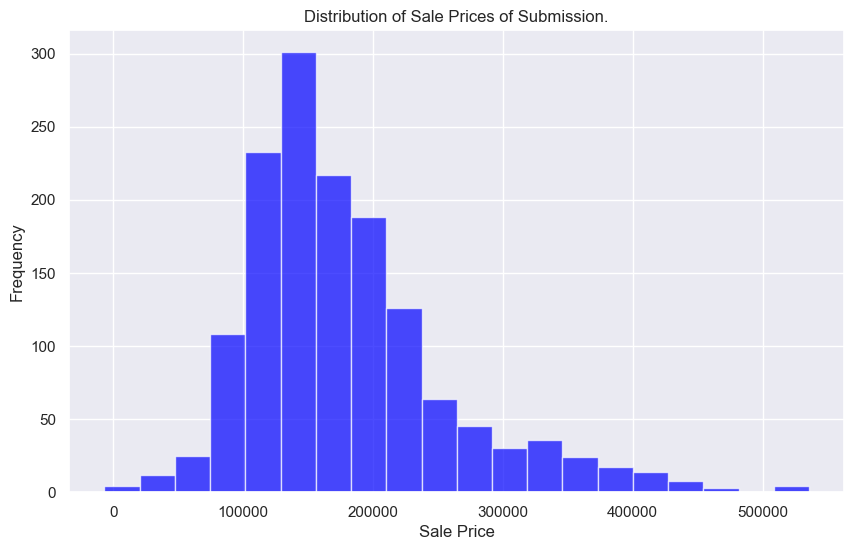

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(submission['SalePrice'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Sale Prices of Submission.')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()